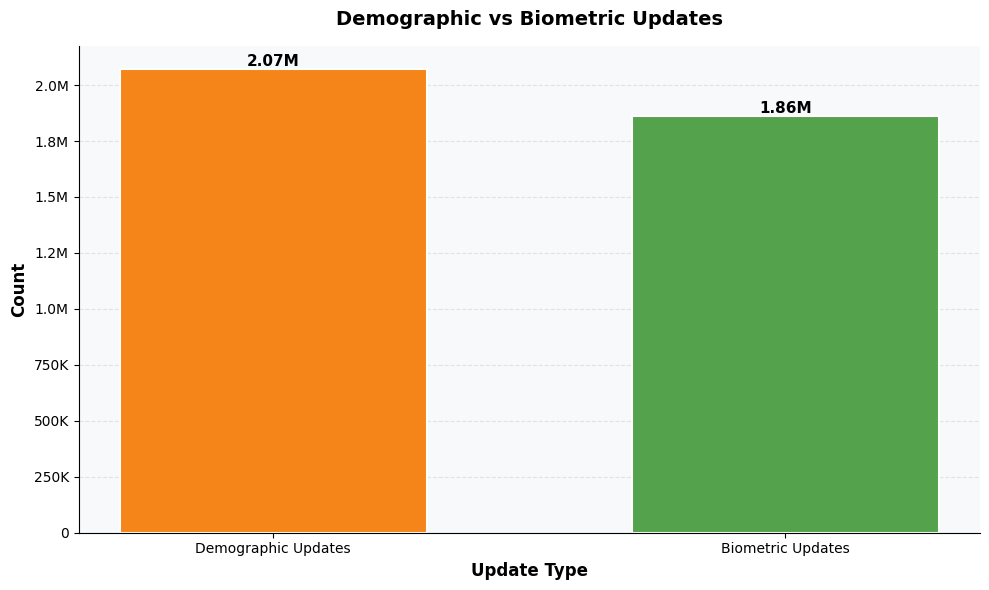


SUMMARY STATISTICS
Demographic Updates: 2,071,683
Biometric Updates: 1,861,103
Total Updates: 3,932,786
Demographic Percentage: 52.68%
Biometric Percentage: 47.32%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

counts={
    "Demographic Updates":len(demographic_df),
    "Biometric Updates":len(biometric_df)
}


fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(
    counts.keys(),
    counts.values(),
    color=["#F58518", "#54A24B"],
    edgecolor="white",
    linewidth=1.5,
    width=0.6
)


def format_millions(y, pos):
    if y >= 1_000_000:
        return f"{y/1_000_000:.1f}M"
    elif y >= 1_000:
        return f"{y/1_000:.0f}K"
    else:
        return f"{y:.0f}"

ax.yaxis.set_major_formatter(FuncFormatter(format_millions))


for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{height/1_000_000:.2f}M',
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

ax.set_ylabel("Count", fontsize=12, fontweight="bold")
ax.set_xlabel("Update Type", fontsize=12, fontweight="bold")
ax.set_title("Demographic vs Biometric Updates", fontsize=14, fontweight="bold", pad=15)


ax.grid(axis="y", linestyle="--", alpha=0.3)
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor("#f8f9fa")
fig.patch.set_facecolor("white")

plt.tight_layout()
plt.show()


print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(f"Demographic Updates: {counts['Demographic Updates']:,}")
print(f"Biometric Updates: {counts['Biometric Updates']:,}")
print(f"Total Updates: {sum(counts.values()):,}")
print(f"Demographic Percentage: {counts['Demographic Updates']/sum(counts.values())*100:.2f}%")
print(f"Biometric Percentage: {counts['Biometric Updates']/sum(counts.values())*100:.2f}%")
print("="*50)
